##EXPAND Python Coding Notes

## Opening FITS - Astropy Tutorial

In [ ]:
#from the example in https://learn.astropy.org/tutorials/FITS-images.html
#import statements
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.utils.data import download_file

In [ ]:
#initializing path for file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

#creating variable to hold FITS file
image_data = fits.getdata(image_file)

<class 'numpy.ndarray'>
(893, 891)


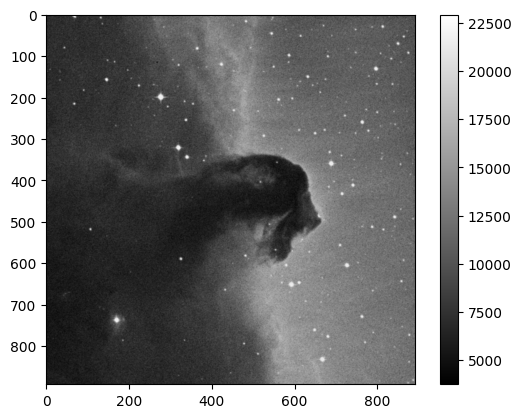

In [ ]:
#using print statements to find type of array for data/FITS file
#using prtint statement to get shape of array for data/FITS file
print(type(image_data))
print(image_data.shape)

#plotting FITS file using imshow() function
plt.imshow(image_data, cmap='gray')
plt.colorbar()



# Astrophysics Tutorials

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install healpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 16.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import healpy as hp
import pandas as pd
import operator
import pickle
import statistics
import sys
import seaborn as sns

from astropy.table import QTable, Table, Column
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table
from astropy.io import fits
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from pylab import *
from astropy.convolution import convolve, Gaussian2DKernel
from astropy.cosmology import Planck15
from healpy import  *
from tabulate import tabulate
from operator import itemgetter
from sklearn.model_selection import train_test_split
import scipy

### Using healpy pixelfunctions

In [ ]:
!pip install healpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 40.3 MB/s eta 0:00:00


In [ ]:
hp.get_nside(map)

1024

HEALPY DOCUMENTATION: https://healpy.readthedocs.io/en/latest/healpy_pix.html

**Understanding Healpy functions**

* **pixelfunc** are functions related to manipulating pixels.

* **'nside'** is related to the resolution and the number of pixels of a map. The 'nside' of this fits file is 1024.


* The function **nside2npix** returns the number of pixels for the nside.

* The **beam** is used to describe the area of radiaiton in the sky the telescope can detect. Effective beam is the averaging of the signals detected by the telescope and by the map making process, has to do with the angular resolution of the map, varies from pixel to pixel across the sky.

https://minerva.union.edu/marrj/radioastro/Instructions_SRTbeam.html#:~:text=So%2C%20%22the%20beam%22%20of,telescope%20has%20a%20wider%20beam.

https://wiki.cosmos.esa.int/planck-legacy-archive/index.php/Beams



In [ ]:
import healpy as hp

#healpy pixel function - nside2npix
hp.pixelfunc.nside2npix(2048)

50331648

### Opening a CMB Map

SITE: https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/previews/COM_CMB_IQU-nilc_2048_R3.00_full/index.html

FILE NAME: COM_CMB_IQU-nilc_2048_R3.00_hm1.fits

The Cosmic Microwave Background Radiation (CMB) is the oldest light detectable and a remnant of the Big Bang. The CMB was created approximately 400,000 years after the Big Bang. At that point, the universe had cooled enough for photons to decouple from ordinary matter particles, allowing light to travel freely through the cosmos for the first time. The CMB is predominantly isotropic but anisotropies in the CMB give information about the structure of the early universe. The following is a a temperature map of the CMB, used to help us better understand the distribution of matter in the early universe. Colder regions of the CMB were likely to be denser and warmer regions were less dense.

The units used for CMB tempeture map are μK or K. (https://wiki.cosmos.esa.int/planck-legacy-archive/index.php/CMB_maps, 2018 CMB Maps - Planck Legacy Archive Wiki)

The color scale represents the temperature fluctuations in the CMB by represeting the temperature of each pixel depending on what color it is. For example, with this color scale, the darker pixels are colder and lighter pixels are warmer than the temperature of the CMB.

In [ ]:
#run this to get to the right directory OR you can use path_to_data below
cd '/content/drive/MyDrive/EXPAND_folder/FITS/'

In [ ]:
#path_to_data = '/content/drive/MyDrive/EXPAND_folder/FITS/'
test = hp.read_map('drive/MyDrive/EXPAND_folder/FITS/COM_CMB_IQU-commander_1024_R2.02_full.fits')

#mollview is a specific kind of map view, useful for envisioning the CMB
#it is also a specific visualation function in the healpy library
hp.mollview(test, title='PLOT TITLE HERE', cmap='viridis')

In [ ]:
import astropy
from astropy.io import fits
CMB_file = astropy.io.fits.open('drive/MyDrive/EXPAND_folder/FITS/COM_CMB_IQU-commander_1024_R2.02_full.fits')
CMB_file.info()
CMB_data = CMB_file[1].data

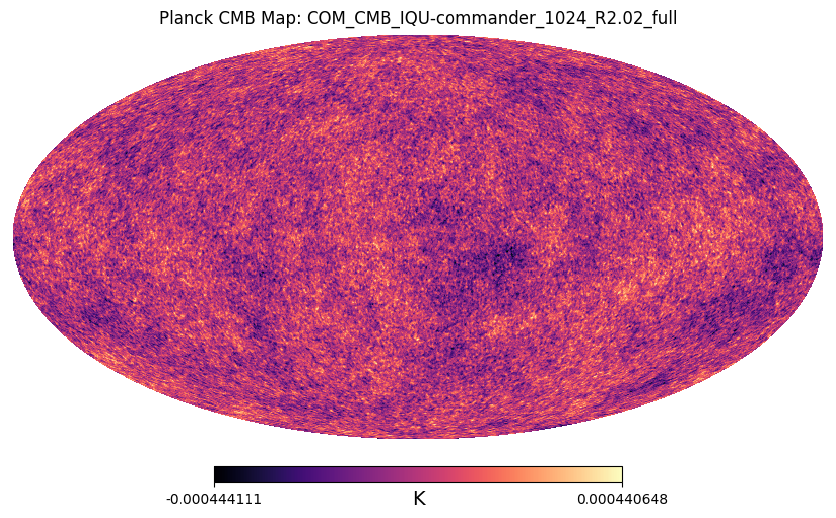

In [ ]:
import healpy as hp
path_to_data = '/content/drive/MyDrive/EXPAND_folder/FITS/'
map = hp.read_map('drive/MyDrive/EXPAND_folder/FITS/COM_CMB_IQU-commander_1024_R2.02_full.fits')

hp.mollview(map, title='Planck CMB Map: COM_CMB_IQU-commander_1024_R2.02_full', cmap='magma', unit= 'K')


#CMB Maps and Analysis

# CMB Map 1

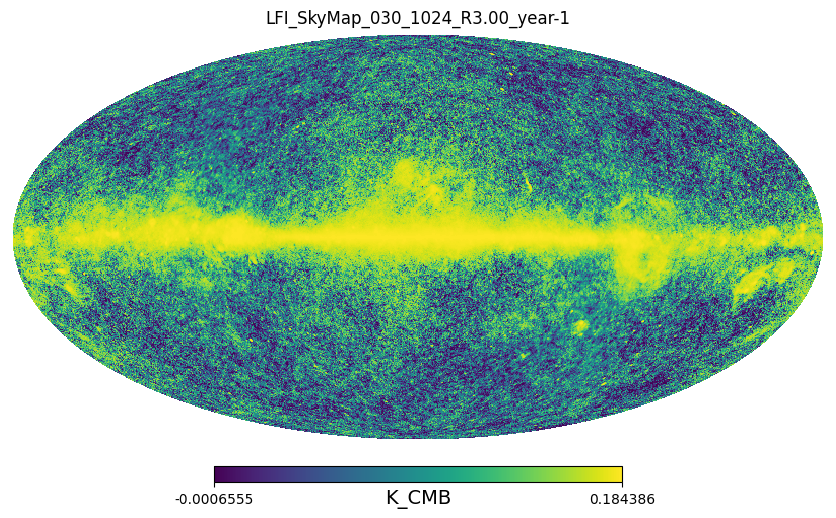

In [ ]:
#https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/previews/LFI_SkyMap_030_1024_R3.00_year-1/index.html
import healpy as hp
path_to_data = '/content/drive/MyDrive/EXPAND_folder/FITS/'
map = hp.read_map('drive/MyDrive/EXPAND_folder/FITS/LFI_SkyMap_030_1024_R3.00_year-1 (1).fits')

hp.mollview(map, title='LFI_SkyMap_030_1024_R3.00_year-1', cmap='viridis', unit= 'K_CMB', norm = 'hist')

 The bright streak across the center of the CMB map is the galactic plane of the Milky Way. It appears so hot on the map because it is much brighter than the CMB due to 'free electrons' and dust grains in the intergalactic medium.  The galactic plane is the plane on which most of the Milky Way's mass resides. From the earth, this plane appears as one of the Milky Way's spiral arms.

 Header for CMB map 1: https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/previews/LFI_SkyMap_030_1024_R3.00_year-1/header.txt

# CMB Map 2

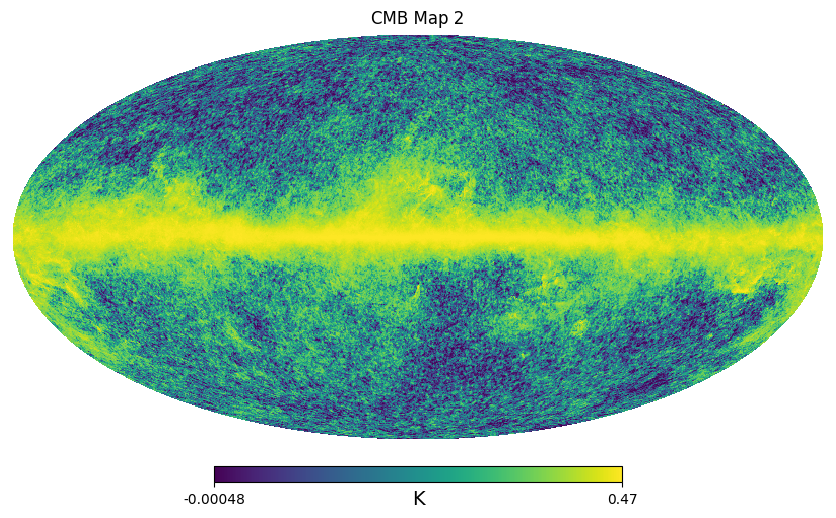

In [ ]:
#https://irsa.ipac.caltech.edu/data/Planck/release_1/all-sky-maps/previews/HFI_SkyMap_217_2048_R1.10_nominal/index.html
import numpy as np
import healpy as hp
path_to_data = '/content/drive/MyDrive/EXPAND_folder/FITS/'
map = hp.read_map('drive/MyDrive/EXPAND_folder/FITS/HFI_SkyMap_217_2048_R1.10_nominal.fits')

hp.mollview(map, title='CMB Map 2', cmap='viridis', unit= 'K', min = -4.8e-4, max = 0.47, norm = 'hist')

# CMB Map 3

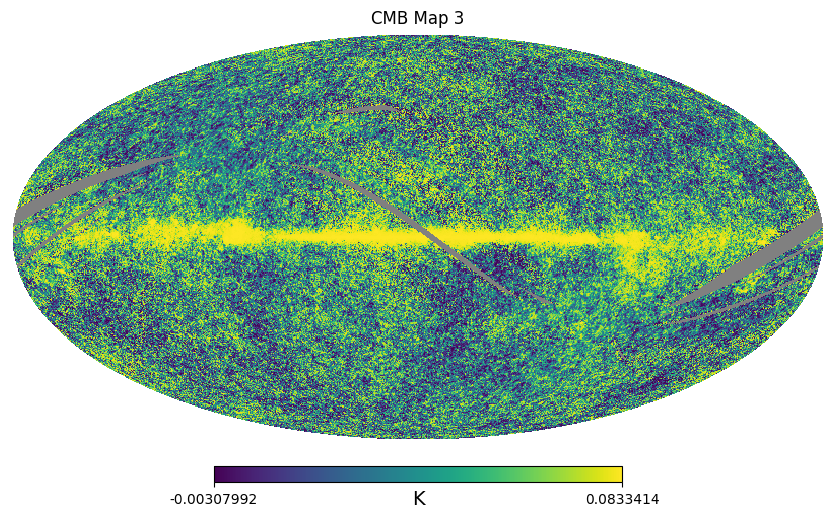

In [ ]:
import numpy as np
import healpy as hp
path_to_data = '/content/drive/MyDrive/EXPAND_folder/FITS/'
map = hp.read_map('drive/MyDrive/EXPAND_folder/FITS/LFI_SkyMap_070_1024_R2.01_year-4.fits')

hp.mollview(map, title='CMB Map 3', cmap='viridis', unit= 'K', norm = 'hist')

The grey streaks in the map likely represent instrumental artefacts or issues with foreground subtraction.

The paper associated with this data is the Planck 2018 results for the Low Frequency Instrument:
https://www.aanda.org/articles/aa/full_html/2020/09/aa33293-18/aa33293-18.html

Header for CMB map 3: https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/previews/LFI_SkyMap_070_1024_R3.00_year-4/header.txt

# CMB Map 4

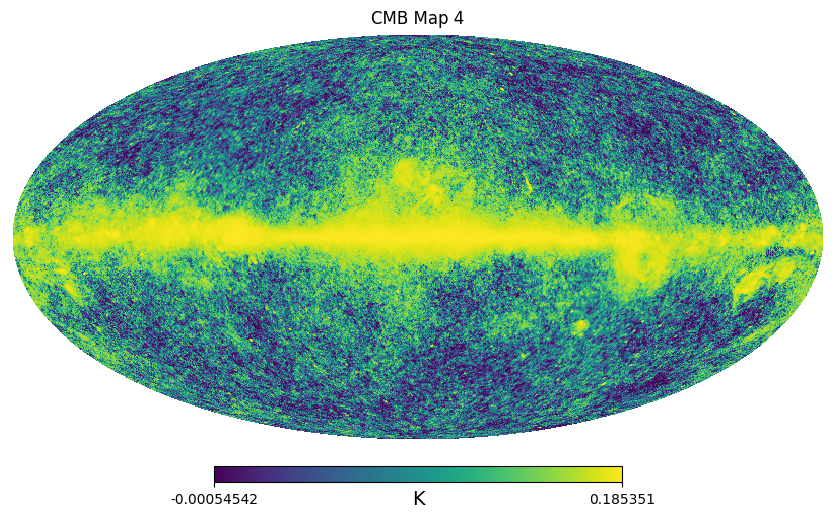

In [ ]:
import numpy as np
import healpy as hp
path_to_data = '/content/drive/MyDrive/EXPAND_folder/FITS/'
map = hp.read_map('drive/MyDrive/EXPAND_folder/FITS/LFI_SkyMap_030_1024_R2.01_year-1-3.fits')

hp.mollview(map, title='CMB Map 4', cmap='viridis', unit= 'K', norm = 'hist')

This map appears less pixelated than the other CMB maps because this map has a lower NSIDE (1204) than CMB map 2 (2048). However, it looks less pixelated than CMB map 1 and 3 despite having the same number of pixels as they do (NSIDE: 1204). This may be because the NAXIS1 of CMB map 1 and 3 is greater than the NAXIS1 of CMB map 4. NAXIS1 map refers to the number of pixels in the horizontal direction of the map.

Header for CMB map 4: https://irsa.ipac.caltech.edu/data/Planck/release_2/all-sky-maps/previews/LFI_SkyMap_030_1024_R2.01_year-1-3/index.html

### Extracting Power Spectrum from CMB map

In [ ]:
def GetClTot(pixmap, beam=0.,mask=None, lmax=None):
    """
    Extracts power spectrum from given CMB map
    TBD...also deconvolves for Masking, Pixel Window, Beam

    pixmap = CMB map, should be a 1x array from FITS file
    beam = beam size (Planck 2018 has Table that gives beam size but for here I'm assuming 0)
    mask = if you want to take out galactic plane, point sources, AGN, etc...)
    """
    nside = hp.npix2nside(pixmap.size) #need to know map size, here 2048 which is checked above
    #getting the nside of the map using the size of the map/number of pixels
    if mask is None: #if you are not masking a galactic plane, point sources, AGN, etc. ..
        mask = np.ones_like(pixmap) #set mask to be an array of ones with the same shape and size as the map
        fsky = 1. #fsky refers to amount of sky coverage
    else:
        assert hp.isnpixok(mask.size) #check that the number of pixels of the mask is valid
        fsky = np.mean(mask**2)

    cl = hp.anafast(pixmap*mask, lmax=lmax) #getting power spectrum --> using map*mask to account for the mask, and the maximum frequency of the power spectrum

    print(np.shape(cl),'size cl') #print shape of the power spectrum
    if lmax is None:
        lmax = cl.size - 1 #if there is no maximum frequency, set to one minus the size of the power spectrum


    print(np.shape(cl), np.shape(hp.pixwin(nside, lmax=lmax)), np.shape(hp.gauss_beam(np.deg2rad(beam/60.), lmax=lmax)))
    #print the shape of the power spectrum, the shape of the pixel window funciton (average signal in each pixel?) of the nside of the map, shape of beam window function)
    cl /= hp.pixwin(nside, lmax=lmax)**2 # dividing power spectrum by average signal in each pixel; Pixel window funct
    cl /= hp.gauss_beam(np.deg2rad(beam/60.), lmax=lmax)**2 # dividing power spectrum by average signal in beam; Beam
    cl /= fsky # Masking effect

    return cl

**Beam size** or **beam width** is the angular width (how wide it appears from the telescope) of a telescope's beam and measure of the resolution of the telescope. A smaller beam width means better resolution.

The **"anafast"** function does harmonic analysis of the map up to lmax (spherical harmonic order) and evaluates the spherical harmonic coefficient

Harmonic analysis is used to represent a periodic function by decomposing into sums of sines and cosines.

*Still to investigate: What is the max spherical harmonic order and the spherical harmonic coefficient?*


https://healpix.jpl.nasa.gov/html/facilitiesnode7.htm
https://healpy.readthedocs.io/en/latest/generated/healpy.sphtfunc.anafast.html

A **gaussian beam** is a beam of light which has an amplitude envelope (smooth curve outlining extremes of a wave) that is given by a Gaussian function (the bell curve function) https://www.youtube.com/watch?v=MU4eOJw2sBQ


In [ ]:
PS_CMB = GetClTot(map, beam=0.,mask=None, lmax=None)

(3072,) size cl
(3072,) (3072,) (3072,)


These numbers represent the shape of the power spectrum, the signal from each pixel, the signal from the beam.

In [ ]:
print(PS_CMB)

[1.31422783e-14 5.79014932e-13 2.44958004e-10 ... 3.46229149e-21
 3.54188117e-21 3.48467461e-21]


In [ ]:
pwr_spect= np.abs(np.fft.fft(PS_CMB))**2 #power spectrum as the absolute value of the Fourier analysis (representing as a sum of sine waves) of PS_CMB

In [ ]:
print(pwr_spect)
print(len(pwr_spect))

[5.12815852e-18 5.03811955e-18 4.82745704e-18 ... 4.58132871e-18
 4.82745704e-18 5.03811955e-18]
3072


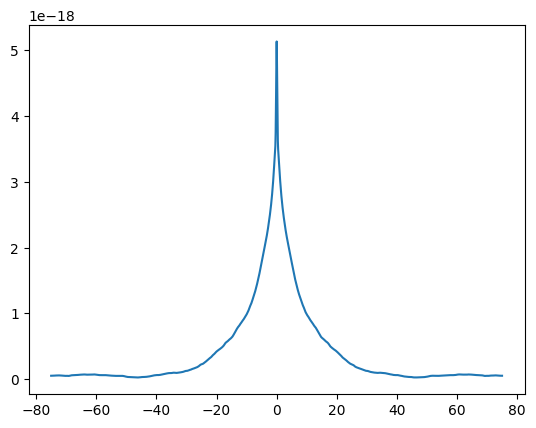

In [ ]:
time_step = 1/150
freqs = np.fft.fftfreq(PS_CMB.size, time_step)
index = np.argsort(freqs)
plt.plot(freqs[index],pwr_spect[index])

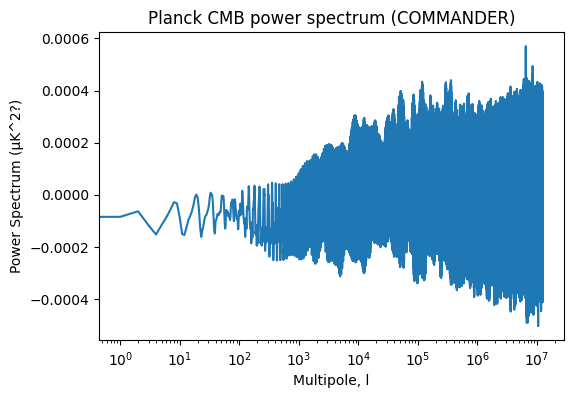

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(test)
plt.ylabel('Power Spectrum (μΚ^2?)')
plt.xlabel('Multipole, l')
plt.xscale("log")
plt.title('Planck CMB power spectrum (COMMANDER)')
plt.show()